Email Spam Detection

Step1: Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

Step2: Load and Visualize the dataset

In [3]:
# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Explore the dataset
print(df.head())
print(df.info())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

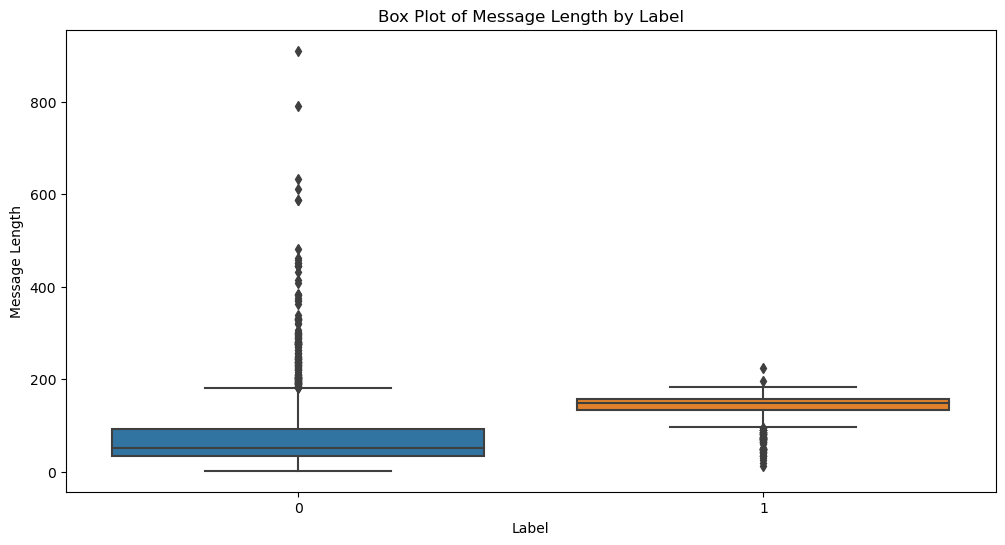

In [19]:
# Box plot for message length
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='length', data=df)
plt.title('Box Plot of Message Length by Label')
plt.xlabel('Label')
plt.ylabel('Message Length')
plt.show()

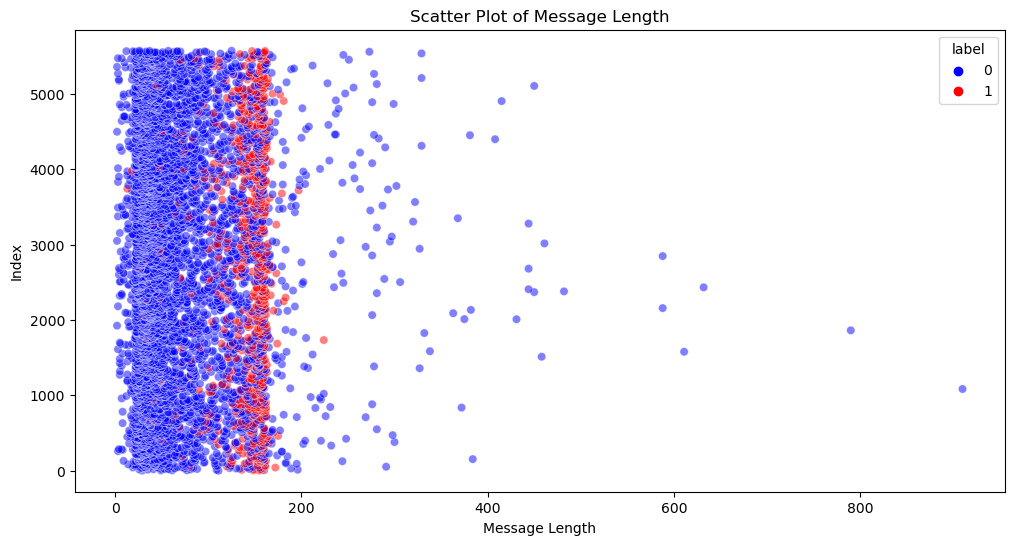

In [20]:
# Scatter plot for message length vs. frequency
plt.figure(figsize=(12, 6))
sns.scatterplot(x='length', y=df.index, hue='label', data=df, palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('Scatter Plot of Message Length')
plt.xlabel('Message Length')
plt.ylabel('Index')
plt.show()

Step3: Preprocessing the Data

In [4]:
# Drop unnecessary columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

# Rename columns
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

Step4: Split the Dataset

In [5]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

Step5: Feature Extraction

In [6]:
# Convert text data to numerical data
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train)

# Transform counts to tf-idf
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

Step6: Train the Model

In [7]:
# Train the model
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)

MultinomialNB()

Step7: Evaluate the Model

In [9]:
# Transform the test data
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = tfidf_transformer.transform(x_test_counts)

# Make predictions
y_pred = model.predict(x_test_tfidf)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



Step8: Visualization

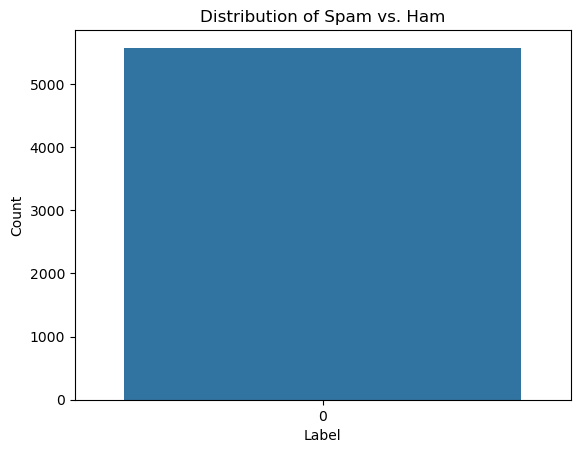

In [16]:
# Plot the distribution of spam vs. ham
sns.countplot(df['label'])
plt.title('Distribution of Spam vs. Ham')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


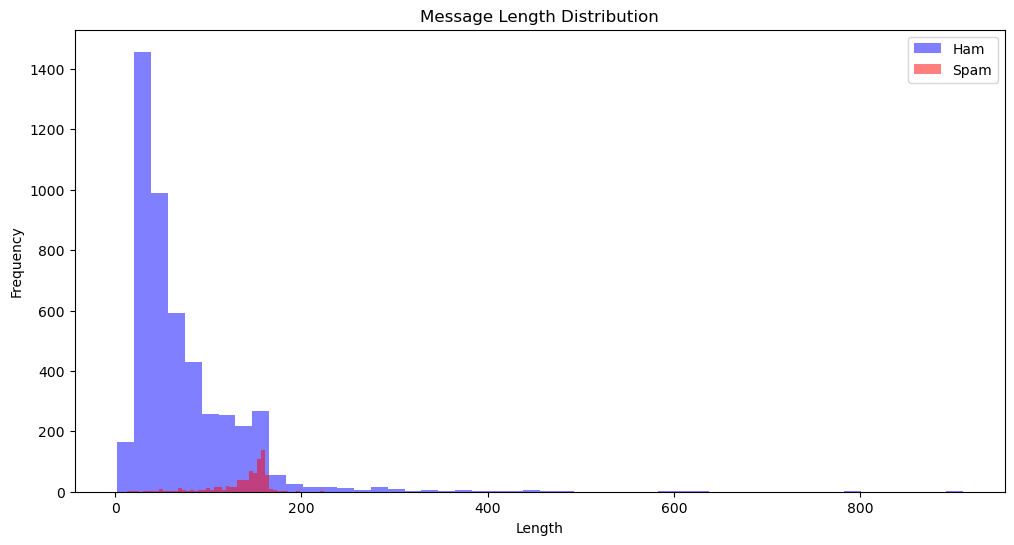

In [17]:
# Add a column for message length
df['length'] = df['message'].apply(len)

# Plot the message length distribution
plt.figure(figsize=(12, 6))
df[df['label'] == 0]['length'].plot(kind='hist', bins=50, alpha=0.5, color='blue', label='Ham')
df[df['label'] == 1]['length'].plot(kind='hist', bins=50, alpha=0.5, color='red', label='Spam')
plt.legend()
plt.title('Message Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


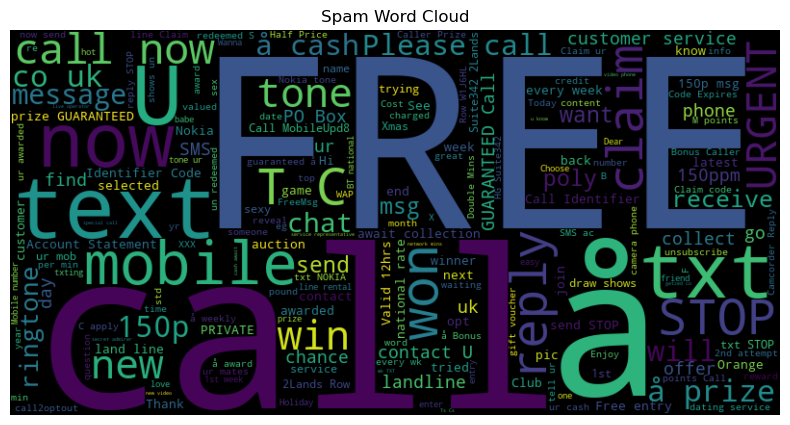

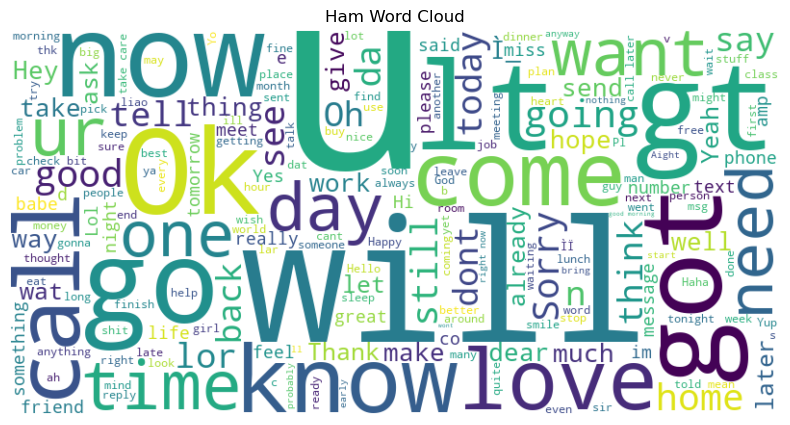

In [18]:
from wordcloud import WordCloud

# Generate word clouds for spam and ham
spam_words = ' '.join(list(df[df['label'] == 1]['message']))
ham_words = ' '.join(list(df[df['label'] == 0]['message']))

# Spam word cloud
spam_wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=200).generate(spam_words)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')
plt.show()

# Ham word cloud
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(ham_words)
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')
plt.show()
